In [ ]:
import random
import numpy as np

def generate_uniform_values(n):
    values = []
    step_size = 1 / n

    for i in range(n + 1):
        value = i * step_size
        values.append(value)

    return values

# Example usage
# n = int(input("Enter the quantization variable (n): "))
n=20
uniform_values = generate_uniform_values(n)
# uniform_values = [1]
print(uniform_values)



# initial_mat = np.array([[1/9, 1/9, 1/9],[1/9, 1/9, 1/9],[1/9, 1/9, 1/9]])

# initial_mat = np.array([[1/6, 5/6, 0],[0, 0, 0],[0, 0, 0]])

# initial_mat = np.array([[1/6, 0, 5/6],[0, 0, 0],[0, 0, 0]])

# initial_mat = np.array([[0, 1/2, 1/2],[0, 0, 0],[0, 0, 0]])
# initial_mat = np.array([[0, 1/3, 1/3],[0, 1/3, 0],[0, 0, 0]])
# initial_mat =  np.array([[0, 1/6, 1/6],[0, 1/6, 1/6],[0, 1/6, 1/6]])
# initial_mat = np.array([[0, 1/6, 1/6],[0, 0, 0],[0, 1/3, 1/3]])
# initial_mat = np.array([[0, 1/6, 1/6],[0, 0, 0],[0, 2/3, 0]])
initial_mat = np.array([[0, 1/3, 1/6],[0, 0, 1/6],[0, 1/3, 0]])


# initial_mat = np.array([[1/3, 1/3, 1/3],[0, 0, 0],[0, 0, 0]])


initial_belief = initial_mat/np.sum(initial_mat)   #checkpoint to enter proper prob dist.
# initial_belief = np.array([[0, 0.5, 0.5],[0, 0, 0],[0, 0, 0]])


print(initial_belief)


def update_belief1(p, ag, pa, pi_t):
    update_matrix = np.array([[(1-p)*(1-p), (1-p)*(1-ag), (1-p)*(1-pa)],
                              [(1-ag)*(1-p), (1-ag)*(1-ag), (1-ag)*(1-pa)],
                              [(1-pa)*(1-p), (1-ag)*(1-pa), (1-pa)*(1-pa)]])

    updated_belief11 = np.multiply(update_matrix, pi_t)
    if (np.sum(updated_belief11)==0):updated_belief1 = updated_belief11
    else: updated_belief1 = updated_belief11/np.sum(updated_belief11)

#     return updated_belief1
    return np.round(updated_belief1, decimals = 5)


updated_matrices = []  # List to store the updated matrices



def update_belief2(p, ag, pa, pi_t):
    update_matrix = np.array([[(1-p)*p, (1-p)*(ag), (1-p)*(pa)],
                              [(1-ag)*(p), (1-ag)*(ag), (1-ag)*(pa)],
                              [(1-pa)*(p), (ag)*(1-pa), (1-pa)*(pa)]])

    updated_belief22 = np.multiply(update_matrix, pi_t)
    if (np.sum(updated_belief22)==0):updated_belief2=updated_belief22
    else: updated_belief2 = updated_belief22/np.sum(updated_belief22)

#     return updated_belief2
    return np.round(updated_belief2, decimals = 5)

def update_belief3(p, ag, pa, pi_t):
    update_matrix = np.array([[(1-p)*p, (p)*(1-ag), (p)*(1-pa)],
                              [(ag)*(1-p), (1-ag)*(ag), (ag)*(1-pa)],
                              [(pa)*(1-p), (1-ag)*(pa), (1-pa)*(pa)]])

    updated_belief33 = np.multiply(update_matrix, pi_t)
    if(np.sum(updated_belief33)==0): updated_belief3 =updated_belief33
    else:updated_belief3 = updated_belief33/np.sum(updated_belief33)

#     return updated_belief3
    return np.round(updated_belief3, decimals = 5)

def update_belief4(p, ag, pa, pi_t):
    update_matrix = np.array([[(p)*p, (p)*(ag), (p)*(pa)],
                              [(ag)*(p), (ag)*(ag), (ag)*(pa)],
                              [(pa)*(p), (ag)*(pa), (pa)*(pa)]])

    updated_belief44 = np.multiply(update_matrix, pi_t)
    if(np.sum(updated_belief44)==0): updated_belief4 =updated_belief44
    else:updated_belief4 = updated_belief44/np.sum(updated_belief44)

#     return updated_belief4
    return np.round(updated_belief4, decimals = 5)

ag=1
pa=0
def updating_the_belief(ag,pa,uniform_values,belief):
    for i in range(len(uniform_values)):
        updated_belief1=update_belief1(uniform_values[i], ag, pa, initial_belief)
        updated_matrices.append(updated_belief1)

    for i in range(len(uniform_values)):
        updated_belief2=update_belief2(uniform_values[i], ag, pa, initial_belief)
        updated_matrices.append(updated_belief2)

    for i in range(len(uniform_values)):
        updated_belief3=update_belief3(uniform_values[i], ag, pa, initial_belief)
        updated_matrices.append(updated_belief3)

    for i in range(len(uniform_values)):
        updated_belief4=update_belief4(uniform_values[i], ag, pa, initial_belief)
        updated_matrices.append(updated_belief4)
    return updated_matrices

# up_matrices = updating_the_belief(ag,pa,uniform_values,initial_belief)
# print('up_matrices:',up_matrices)


def find_unique_matrix(updated_matrices):

      # # Print the appended matrices
      # for matrix in updated_matrices:
      #     print('all belief matrix',matrix)
      #     print()  # Add an empty line for readability

      # Convert the list to a NumPy array
    updated_matrices = np.array(updated_matrices)

      # Remove duplicate matrices
    unique_matrices = np.unique(updated_matrices, axis=0)

      # # Print the unique matrices
      # for matrix in unique_matrices:
      #     print('unique_matrix',matrix)
      #     print()  # Add an empty line for readability
    return unique_matrices


# unique_matrices = find_unique_matrix(updated_matrices)

#Code for value function calculation
T = 10
updated_mat = [[] for _ in range(T)]
unique_updated_mat = [[] for _ in range(T)]
# bel = initial_belief

updated_mat[0].append(initial_belief)
unique_updated_mat[0].append(initial_belief)

for t in range(T-1):
    for b_e in updated_mat[t]:
        bel = updating_the_belief(ag, pa, uniform_values, b_e)
        updated_mat[t+1].append(bel)
        unique_updated_mat[t+1].append(find_unique_matrix(updated_mat[t+1][0]))

# Printing the updated matrices
for t in range(T):
    print(f"Updated Belief at T={t+1}:")
    print('updated_mat[t]:',updated_mat[t])
    # for b1 in updated_mat[t]:
    #     print(b1)
    # print()
    print(f"Unique Updated Belief at T={t+1}:")
    print('unique updated_mat[t]:',unique_updated_mat[t])
    # for b2 in unique_updated_mat[t]:
    #     print(b2)
    # print()


def find_closest_key(dictionary, target_key):
    min_distance = float('inf')
    closest_key = None

    for key in dictionary.keys():
        distance = np.linalg.norm(key - target_key)  # Calculate the distance using numpy's norm function
        if distance < min_distance:
            min_distance = distance
            closest_key = key

    if closest_key is not None:
        return dictionary[closest_key]
    else:
        return None  # If no closest key is found


# V = [0] * (T+1)

cost=[1,0,0,1]
a=0.9
b=0.8
c=0.5
# matrix_dict = {}
array_of_dicts=[{} for _ in range(T)]


for matrix in unique_updated_mat[T-1][0]:
    min_val=100
    if(np.sum(matrix[0])==0):new=matrix[0]
    else:new=matrix[0]/np.sum(matrix[0])

    if (new[1]>a): p=0
    elif (new[2]>b): p=1
    else:p=c

    # p=uniform_values[i]
    ag=1
    pa=0
    Value=cost[0]*np.sum(np.multiply(matrix,np.array([[(1-p)*(1-p), (1-p)*(1-ag), (1-p)*(1-pa)],[(1-ag)*(1-p), (1-ag)*(1-ag), (1-ag)*(1-pa)],[(1-pa)*(1-p), (1-ag)*(1-pa), (1-pa)*(1-pa)]]))) + cost[1]*np.sum(np.multiply(matrix,np.array([[(1-p)*p, (1-p)*(ag), (1-p)*(pa)],[(1-ag)*(p), (1-ag)*(ag), (1-ag)*(pa)],[(1-pa)*(p), (ag)*(1-pa), (1-pa)*(pa)]])))+cost[2]*np.sum(np.multiply(matrix,np.array([[(1-p)*p, (p)*(1-ag), (p)*(1-pa)],[(ag)*(1-p), (1-ag)*(ag), (ag)*(1-pa)],[(pa)*(1-p), (1-ag)*(pa), (1-pa)*(pa)]])))+cost[3]*np.sum(np.multiply(matrix,np.array([[(p)*p, (p)*(ag), (p)*(pa)],
                          [(ag)*(p), (ag)*(ag), (ag)*(pa)],
                          [(pa)*(p), (ag)*(pa), (pa)*(pa)]])))
    min_val=min(Value,min_val)
    if (Value==min_val): ind=p
    array_of_dicts[T-1][tuple(matrix.flatten())] = [min_val,ind]

print('matrix_dict',array_of_dicts[T-1])


####



for t in range(T-2, 0, -1):
    for mat in unique_updated_mat[t][0]:
        print('mat:',mat)
        min_val1=100
        if(np.sum(mat[0])==0):new=mat[0]
        else:new=mat[0]/np.sum(mat[0])

        if (new[1]>a): p=0
        elif (new[2]>b): p=1
        else:p=c
        # p=uniform_values[i]
        ag=1
        pa=0
        Value11=cost[0]*np.sum(np.multiply(mat,np.array([[(1-p)*(1-p), (1-p)*(1-ag), (1-p)*(1-pa)],[(1-ag)*(1-p), (1-ag)*(1-ag), (1-ag)*(1-pa)],[(1-pa)*(1-p), (1-ag)*(1-pa), (1-pa)*(1-pa)]]))) + cost[1]*np.sum(np.multiply(mat,np.array([[(1-p)*p, (1-p)*(ag), (1-p)*(pa)],[(1-ag)*(p), (1-ag)*(ag), (1-ag)*(pa)],[(1-pa)*(p), (ag)*(1-pa), (1-pa)*(pa)]])))+cost[2]*np.sum(np.multiply(mat,np.array([[(1-p)*p, (p)*(1-ag), (p)*(1-pa)],[(ag)*(1-p), (1-ag)*(ag), (ag)*(1-pa)],[(pa)*(1-p), (1-ag)*(pa), (1-pa)*(pa)]])))+cost[3]*np.sum(np.multiply(mat,np.array([[(p)*p, (p)*(ag), (p)*(pa)],
                                      [(ag)*(p), (ag)*(ag), (ag)*(pa)],
                                      [(pa)*(p), (ag)*(pa), (pa)*(pa)]])))

        updated_belief1=update_belief1(p, ag, pa, mat)
        updated_belief2=update_belief2(p, ag, pa, mat)
        updated_belief3=update_belief3(p, ag, pa, mat)
        updated_belief4=update_belief4(p, ag, pa, mat)


        Key1=find_closest_key(array_of_dicts[t+1], updated_belief1.flatten())
#             print('Key1[0]:',Key1[0])

        Key2=find_closest_key(array_of_dicts[t+1], updated_belief2.flatten())
#             print('Key2[0]:',Key2[0])

        Key3=find_closest_key(array_of_dicts[t+1], updated_belief3.flatten())
#             print('Key3[0]:',Key3[0])

        Key4=find_closest_key(array_of_dicts[t+1], updated_belief4.flatten())
#             print('Key4[0]:',Key4[0])

#             print('array_of_dicts[t+1][tuple(updated_belief1.flatten())][0]:',array_of_dicts[t+1][tuple(updated_belief1.flatten())][0])
        Value12= Key1[0]*np.sum(np.multiply(mat,np.array([[(1-p)*(1-p), (1-p)*(1-ag), (1-p)*(1-pa)],[(1-ag)*(1-p), (1-ag)*(1-ag), (1-ag)*(1-pa)],[(1-pa)*(1-p), (1-ag)*(1-pa), (1-pa)*(1-pa)]]))) + Key2[0]*np.sum(np.multiply(mat,np.array([[(1-p)*p, (1-p)*(ag), (1-p)*(pa)],[(1-ag)*(p), (1-ag)*(ag), (1-ag)*(pa)],[(1-pa)*(p), (ag)*(1-pa), (1-pa)*(pa)]])))+Key3[0]*np.sum(np.multiply(mat,np.array([[(1-p)*p, (p)*(1-ag), (p)*(1-pa)],[(ag)*(1-p), (1-ag)*(ag), (ag)*(1-pa)],[(pa)*(1-p), (1-ag)*(pa), (1-pa)*(pa)]])))+Key4[0]*np.sum(np.multiply(mat,np.array([[(p)*p, (p)*(ag), (p)*(pa)],[(ag)*(p), (ag)*(ag), (ag)*(pa)],[(pa)*(p), (ag)*(pa), (pa)*(pa)]])))
        Value1=Value11+Value12
        min_val1=min(Value1,min_val1)
        if (Value1==min_val1): ind1=p
        array_of_dicts[t][tuple(mat.flatten())] = [min_val1,ind1]
        print('min_val1,ind1:',min_val1,ind1)
    print('array_of_dicts[t]:',array_of_dicts[t])





for mat in unique_updated_mat[0]:
    print('mat:',mat)
    min_val1=100
    if(np.sum(mat[0])==0):new=mat[0]
    else:new=mat[0]/np.sum(mat[0])

    if (new[1]>a): p=0
    elif (new[2]>b): p=1
    else:p=c
    # p=uniform_values[i]
    ag=1
    pa=0
    Value1_1=cost[0]*np.sum(np.multiply(mat,np.array([[(1-p)*(1-p), (1-p)*(1-ag), (1-p)*(1-pa)],[(1-ag)*(1-p), (1-ag)*(1-ag), (1-ag)*(1-pa)],[(1-pa)*(1-p), (1-ag)*(1-pa), (1-pa)*(1-pa)]]))) + cost[1]*np.sum(np.multiply(mat,np.array([[(1-p)*p, (1-p)*(ag), (1-p)*(pa)],[(1-ag)*(p), (1-ag)*(ag), (1-ag)*(pa)],[(1-pa)*(p), (ag)*(1-pa), (1-pa)*(pa)]])))+cost[2]*np.sum(np.multiply(mat,np.array([[(1-p)*p, (p)*(1-ag), (p)*(1-pa)],[(ag)*(1-p), (1-ag)*(ag), (ag)*(1-pa)],[(pa)*(1-p), (1-ag)*(pa), (1-pa)*(pa)]])))+cost[3]*np.sum(np.multiply(mat,np.array([[(p)*p, (p)*(ag), (p)*(pa)],
                                  [(ag)*(p), (ag)*(ag), (ag)*(pa)],
                                  [(pa)*(p), (ag)*(pa), (pa)*(pa)]])))

    updated_belief1=update_belief1(p, ag, pa, mat)
    updated_belief2=update_belief2(p, ag, pa, mat)
    updated_belief3=update_belief3(p, ag, pa, mat)
    updated_belief4=update_belief4(p, ag, pa, mat)

    Key11=find_closest_key(array_of_dicts[1], updated_belief1.flatten())
    Key12=find_closest_key(array_of_dicts[1], updated_belief2.flatten())
    Key13=find_closest_key(array_of_dicts[1], updated_belief3.flatten())
    Key14=find_closest_key(array_of_dicts[1], updated_belief4.flatten())

    Value1_2= Key11[0]*np.sum(np.multiply(mat,np.array([[(1-p)*(1-p), (1-p)*(1-ag), (1-p)*(1-pa)],[(1-ag)*(1-p), (1-ag)*(1-ag), (1-ag)*(1-pa)],[(1-pa)*(1-p), (1-ag)*(1-pa), (1-pa)*(1-pa)]]))) + Key12[0]*np.sum(np.multiply(mat,np.array([[(1-p)*p, (1-p)*(ag), (1-p)*(pa)],[(1-ag)*(p), (1-ag)*(ag), (1-ag)*(pa)],[(1-pa)*(p), (ag)*(1-pa), (1-pa)*(pa)]])))+Key13[0]*np.sum(np.multiply(mat,np.array([[(1-p)*p, (p)*(1-ag), (p)*(1-pa)],[(ag)*(1-p), (1-ag)*(ag), (ag)*(1-pa)],[(pa)*(1-p), (1-ag)*(pa), (1-pa)*(pa)]])))+Key14[0]*np.sum(np.multiply(mat,np.array([[(p)*p, (p)*(ag), (p)*(pa)],[(ag)*(p), (ag)*(ag), (ag)*(pa)],[(pa)*(p), (ag)*(pa), (pa)*(pa)]])))
    Value1=Value1_1+Value1_2
    min_val1=min(Value1,min_val1)
    if (Value1==min_val1): ind1=p
    print('min_val1,ind1:',min_val1,ind1)
    array_of_dicts[0][tuple(mat.flatten())] = [min_val1,ind1]
    print('array_of_dicts[0]:',array_of_dicts[0])


#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
print('Final_array of dictionaries:')
for t in range(T-1,-1,-1):
    print(array_of_dicts[t])
    print()



Streaming output truncated to the last 5000 lines.
        [0.     , 0.     , 0.     ]],

       [[0.     , 0.     , 0.31034],
        [0.     , 0.     , 0.68966],
        [0.     , 0.     , 0.     ]],

       [[0.     , 0.     , 0.33333],
        [0.     , 0.     , 0.66667],
        [0.     , 0.     , 0.     ]],

       [[0.     , 0.     , 0.35484],
        [0.     , 0.     , 0.64516],
        [0.     , 0.     , 0.     ]],

       [[0.     , 0.     , 0.375  ],
        [0.     , 0.     , 0.625  ],
        [0.     , 0.     , 0.     ]],

       [[0.     , 0.     , 0.39394],
        [0.     , 0.     , 0.60606],
        [0.     , 0.     , 0.     ]],

       [[0.     , 0.     , 0.41176],
        [0.     , 0.     , 0.58824],
        [0.     , 0.     , 0.     ]],

       [[0.     , 0.     , 0.42857],
        [0.     , 0.     , 0.57143],
        [0.     , 0.     , 0.     ]],

       [[0.     , 0.     , 0.44444],
        [0.     , 0.     , 0.55556],
        [0.     , 0.     , 0.     ]],

      

Mounted at /content/drive


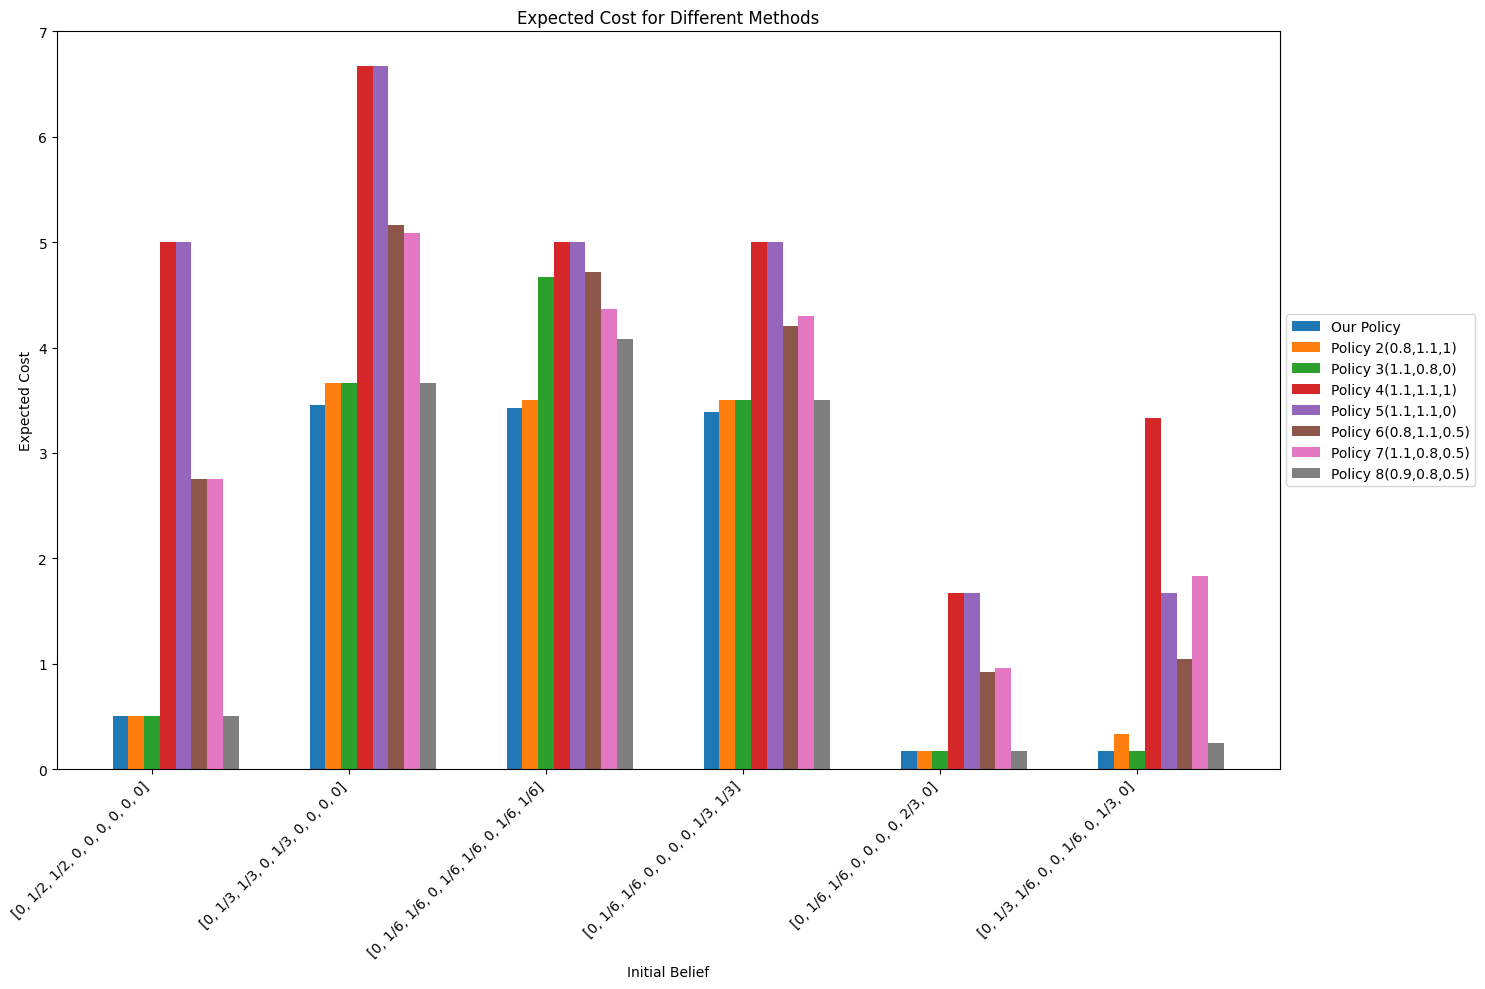

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 10))
# Define the initial belief values
initial_belief = [['0', '1/2', '1/2', '0', '0', '0', '0', '0', '0'],
                  ['0', '1/3', '1/3', '0', '1/3', '0', '0', '0', '0'],
                  ['0', '1/6', '1/6', '0', '1/6', '1/6', '0', '1/6', '1/6'],
                  ['0', '1/6', '1/6', '0', '0', '0', '0', '1/3', '1/3'],
                  ['0', '1/6', '1/6', '0', '0', '0', '0', '2/3', '0'],
                  ['0', '1/3', '1/6', '0', '0', '1/6', '0', '1/3', '0']]

# Define the expected cost values for each belief and method
expected_cost_method1 = [0.5, 3.4572970875, 3.4293483, 3.38959825, 0.16666663,0.16666663]
expected_cost_method2 = [0.5, 3.6666665, 3.50000004, 3.5, 0.166666666,0.3333333333]
expected_cost_method3 = [0.5, 3.6666665, 4.66731770, 3.500015,  0.166666666,  0.166666666]
expected_cost_method4 = [5, 6.6666667, 5.00000001,  5, 1.6666667,3.33333335]
expected_cost_method5 = [5, 6.6666667, 5.00000001,  5, 1.6666667,1.6666667]
expected_cost_method6 = [2.75, 5.166681, 4.71485145, 4.20505764, 0.9166666, 1.04231798]
expected_cost_method7 = [2.75, 5.08203, 4.36881656, 4.29494235, 0.9630472, 1.83463597]
expected_cost_method8 = [0.5, 3.666681, 4.083668, 3.5, 0.166666666, 0.25]

# Set the positions of the bars on the x-axis
x = np.arange(len(initial_belief))

# Set the width of the bars
bar_width = 0.08

# Plot the bar graph
plt.bar(x, expected_cost_method1, width=bar_width, label='Our Policy')
plt.bar(x + bar_width, expected_cost_method2, width=bar_width, label='Policy 2(0.8,1.1,1)')
plt.bar(x + 2*bar_width, expected_cost_method3, width=bar_width, label='Policy 3(1.1,0.8,0)')
plt.bar(x + 3*bar_width, expected_cost_method4, width=bar_width, label='Policy 4(1.1,1.1,1)')
plt.bar(x + 4*bar_width, expected_cost_method5, width=bar_width, label='Policy 5(1.1,1.1,0)')
plt.bar(x + 5*bar_width, expected_cost_method6, width=bar_width, label='Policy 6(0.8,1.1,0.5)')
plt.bar(x + 6*bar_width, expected_cost_method7, width=bar_width, label='Policy 7(1.1,0.8,0.5)')
plt.bar(x + 7*bar_width, expected_cost_method8, width=bar_width, label='Policy 8(0.9,0.8,0.5)')
# Set the labels and title

plt.xlabel('Initial Belief')
plt.ylabel('Expected Cost')
plt.title('Expected Cost for Different Methods')

# Set the x-axis ticks and labels
plt.xticks(x + 2*bar_width, ['[' + ', '.join(belief) + ']' for belief in initial_belief], rotation=45, ha='right')


# Add a legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()

# plt.savefig('figure.png')


from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Save the figure to a specific directory in Google Drive
plt.savefig('/content/drive/MyDrive/Figure.png')



# Show the plot

plt.show()

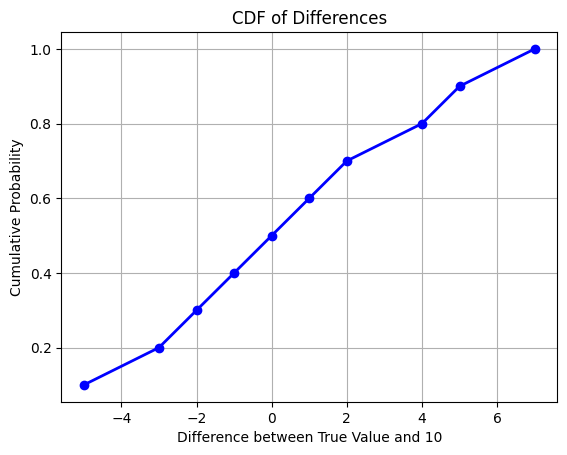

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Create a sample array of differences between true_value and 10
differences = np.array([2, -1, 5, 0, -3, 7, -2, 4, 1, -5])

# Sort the differences for plotting the CDF
sorted_differences = np.sort(differences)

# Calculate the cumulative probabilities
cumulative_probs = np.arange(1, len(sorted_differences) + 1) / len(sorted_differences)

# Plot the CDF
plt.plot(sorted_differences, cumulative_probs, marker='o')

# Add labels and title
plt.xlabel('Difference between True Value and 10')
plt.ylabel('Cumulative Probability')
plt.title('CDF of Differences')

# Display the grid
plt.grid(True)

# Optionally, you can customize the appearance of the plot
# For example, changing line color and style
plt.gca().get_lines()[0].set_color('b')
plt.gca().get_lines()[0].set_linewidth(2)

# Adjust the axis limits if needed
# plt.xlim([min(sorted_differences), max(sorted_differences)])

# Optionally, you can save the plot to a file
# plt.savefig('cdf_plot.png')

# Show the plot
plt.show()
